In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import csv
import plotly.express as px
source_file = 'source_data/housing_data_cleaned.csv'

In [3]:
housing_df = pd.read_csv(source_file, encoding='utf-8', low_memory=False)
housing_df.head()

,basements,building_code_description,category_code_description,census_tract,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,...,topography,total_area,total_livable_area,type_heater,unit,view_type,year_built,year_built_estimate,zip_code,zoning
0,D,ROW 3 STY MASONRY,Single Family,241.0,N,67.0,49200,0,4.0,0.0,...,F,938.00,1344.0,A,NaN,I,1895.0,Y,19144.0,RSA5
1,NaN,RES CONDO 3 STY MAS+OTH,Single Family,337.0,Y,0.0,45000,0,4.0,0.0,...,NaN,0.00,947.0,NaN,B307,I,1970.0,Y,19152.0,RM2
2,NaN,ROW 2 STY MASONRY,Single Family,201.0,NaN,70.0,0,0,4.0,0.0,...,F,1044.00,1190.0,NaN,NaN,I,1940.0,Y,19140.0,RM1
3,H,ROW B/GAR 2 STY MASONRY,Single Family,281.0,N,95.5,0,0,4.0,0.0,...,F,1686.53,1633.0,B,NaN,I,1940.0,Y,19141.0,RSA3
4,NaN,ROW 2 STY MASONRY,Single Family,293.0,NaN,112.5,0,0,4.0,0.0,...,F,2165.62,1320.0,B,NaN,I,1940.0,Y,19124.0,RSA5


In [4]:
housing_df['sale_date'] = pd.to_datetime(housing_df['sale_date'], unit='D', origin='1899-12-30')
housing_df['sale_date'].head()

0   2020-09-28
1   2020-09-28
2   2020-09-25
3   2020-09-25
4   2020-09-24
Name: sale_date, dtype: datetime64[ns]

In [5]:
#Removing unecessary columns from the dataframe and save to new dataframe
new_df = housing_df[['sale_date', 'sale_price', 'unit', 'year_built', 'zip_code', 'zoning']]
new_df.head()

,sale_date,sale_price,unit,year_built,zip_code,zoning
0,2020-09-28,90000,NaN,1895.0,19144.0,RSA5
1,2020-09-28,145000,B307,1970.0,19152.0,RM2
2,2020-09-25,52500,NaN,1940.0,19140.0,RM1
3,2020-09-25,154000,NaN,1940.0,19141.0,RSA3
4,2020-09-24,65900,NaN,1940.0,19124.0,RSA5


In [6]:
new_df['sale_year'] = pd.DatetimeIndex(new_df['sale_date']).year
new_df.head()

<ipython-input-6-a6e439732123>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sale_year'] = pd.DatetimeIndex(new_df['sale_date']).year


,sale_date,sale_price,unit,year_built,zip_code,zoning,sale_year
0,2020-09-28,90000,NaN,1895.0,19144.0,RSA5,2020
1,2020-09-28,145000,B307,1970.0,19152.0,RM2,2020
2,2020-09-25,52500,NaN,1940.0,19140.0,RM1,2020
3,2020-09-25,154000,NaN,1940.0,19141.0,RSA3,2020
4,2020-09-24,65900,NaN,1940.0,19124.0,RSA5,2020


In [7]:
new_df = new_df.groupby(['sale_year']).sum()
new_df

,sale_price,year_built,zip_code
sale_year,,,
2016,5047819296,40119004.0,396510996.0
2017,6366271510,44202375.0,436553784.0
2018,6913266553,44998876.0,444286610.0
2019,9003771436,44267774.0,437884179.0
2020,2969734150,19003053.0,187966204.0


<IPython.core.display.Javascript object>


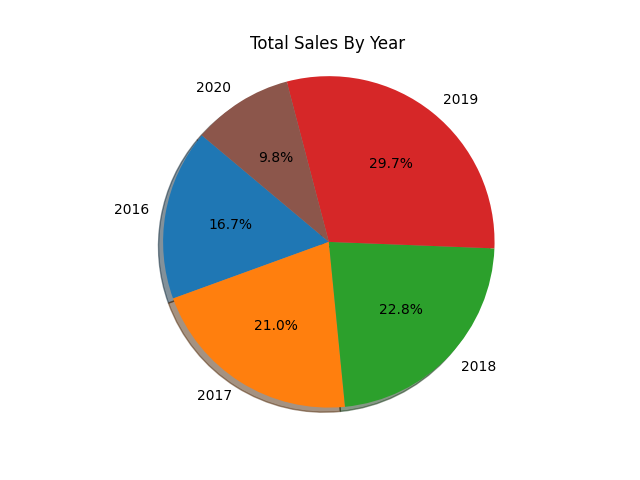

In [8]:
labels = ['2016', '2017', '2018', '2019', '2020']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.0, 0, 0, 0, 0) 
plt.pie(new_df['sale_price'], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Total Sales By Year")
plt.show()


In [9]:
housing_df = pd.read_csv(source_file, encoding='utf-8', low_memory=False)
housing_df.head()

,basements,building_code_description,category_code_description,census_tract,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,...,topography,total_area,total_livable_area,type_heater,unit,view_type,year_built,year_built_estimate,zip_code,zoning
0,D,ROW 3 STY MASONRY,Single Family,241.0,N,67.0,49200,0,4.0,0.0,...,F,938.00,1344.0,A,NaN,I,1895.0,Y,19144.0,RSA5
1,NaN,RES CONDO 3 STY MAS+OTH,Single Family,337.0,Y,0.0,45000,0,4.0,0.0,...,NaN,0.00,947.0,NaN,B307,I,1970.0,Y,19152.0,RM2
2,NaN,ROW 2 STY MASONRY,Single Family,201.0,NaN,70.0,0,0,4.0,0.0,...,F,1044.00,1190.0,NaN,NaN,I,1940.0,Y,19140.0,RM1
3,H,ROW B/GAR 2 STY MASONRY,Single Family,281.0,N,95.5,0,0,4.0,0.0,...,F,1686.53,1633.0,B,NaN,I,1940.0,Y,19141.0,RSA3
4,NaN,ROW 2 STY MASONRY,Single Family,293.0,NaN,112.5,0,0,4.0,0.0,...,F,2165.62,1320.0,B,NaN,I,1940.0,Y,19124.0,RSA5


In [10]:
housing_df.head()
housing_df['sale_date'] = pd.to_datetime(housing_df['sale_date'], unit='D', origin='1899-12-30')
housing_df['sale_date'].head()

0   2020-09-28
1   2020-09-28
2   2020-09-25
3   2020-09-25
4   2020-09-24
Name: sale_date, dtype: datetime64[ns]

In [11]:
#Removing unecessary columns from the dataframe and save to new dataframe
second_df = housing_df[['sale_date', 'sale_price', 'year_built', 'category_code_description','zip_code', 'zoning']]
second_df.head()

,sale_date,sale_price,year_built,category_code_description,zip_code,zoning
0,2020-09-28,90000,1895.0,Single Family,19144.0,RSA5
1,2020-09-28,145000,1970.0,Single Family,19152.0,RM2
2,2020-09-25,52500,1940.0,Single Family,19140.0,RM1
3,2020-09-25,154000,1940.0,Single Family,19141.0,RSA3
4,2020-09-24,65900,1940.0,Single Family,19124.0,RSA5


In [12]:
#creating zip codes into strings
second_df['zip_code'] = second_df['zip_code'].astype('Int64').astype('str')
second_df['zip_code'].head()

<ipython-input-12-06ce5eb1fde1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df['zip_code'] = second_df['zip_code'].astype('Int64').astype('str')


0    19144
1    19152
2    19140
3    19141
4    19124
Name: zip_code, dtype: object

In [13]:
second_df['sale_year'] = pd.DatetimeIndex(second_df['sale_date']).year
second_df.head()

<ipython-input-13-4352dade68bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df['sale_year'] = pd.DatetimeIndex(second_df['sale_date']).year


,sale_date,sale_price,year_built,category_code_description,zip_code,zoning,sale_year
0,2020-09-28,90000,1895.0,Single Family,19144,RSA5,2020
1,2020-09-28,145000,1970.0,Single Family,19152,RM2,2020
2,2020-09-25,52500,1940.0,Single Family,19140,RM1,2020
3,2020-09-25,154000,1940.0,Single Family,19141,RSA3,2020
4,2020-09-24,65900,1940.0,Single Family,19124,RSA5,2020


In [14]:
testzoning_df = second_df.groupby('sale_year')['category_code_description'].value_counts()
testzoning_df

sale_year  category_code_description
2016       Single Family                18419
           Multi Family                  1694
           Mixed Use                      611
2017       Single Family                20144
           Multi Family                  2060
           Mixed Use                      614
2018       Single Family                20582
           Multi Family                  2038
           Mixed Use                      604
2019       Single Family                20470
           Multi Family                  1827
           Mixed Use                      592
2020       Single Family                 8833
           Multi Family                   764
           Mixed Use                      227
Name: category_code_description, dtype: int64

In [15]:
second_df['year_built'].value_counts(normalize=True)

1925.0    0.199403
1920.0    0.157484
1950.0    0.084522
1915.0    0.063743
1900.0    0.045257
            ...   
1843.0    0.000010
1825.0    0.000010
1859.0    0.000010
1765.0    0.000010
1854.0    0.000010
Name: year_built, Length: 196, dtype: float64

In [16]:
second_df['year_built'].value_counts(ascending=True)

1854.0        1
1815.0        1
1798.0        1
1805.0        1
1874.0        1
          ...  
1900.0     4502
1915.0     6341
1950.0     8408
1920.0    15666
1925.0    19836
Name: year_built, Length: 196, dtype: int64

In [17]:
bins = [1750, 1900, 1915, 1935, 1950, 1965, 1980, 1995, 2020]
second_df['binned'] = pd.cut(second_df['year_built'], bins)
second_df.head()

<ipython-input-17-b3ebe0ea9141>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df['binned'] = pd.cut(second_df['year_built'], bins)


,sale_date,sale_price,year_built,category_code_description,zip_code,zoning,sale_year,binned
0,2020-09-28,90000,1895.0,Single Family,19144,RSA5,2020,"(1750, 1900]"
1,2020-09-28,145000,1970.0,Single Family,19152,RM2,2020,"(1965, 1980]"
2,2020-09-25,52500,1940.0,Single Family,19140,RM1,2020,"(1935, 1950]"
3,2020-09-25,154000,1940.0,Single Family,19141,RSA3,2020,"(1935, 1950]"
4,2020-09-24,65900,1940.0,Single Family,19124,RSA5,2020,"(1935, 1950]"


In [18]:
#second_df.groupby(['year_built']).sum().plot(kind='pie', y='sale_year')
bins = [1600, 1900, 1915, 1935, 1950, 1965, 1980, 1995, 2020]
second_df['binned'] = pd.cut(second_df['year_built'], bins)
print (second_df)



       sale_date  sale_price  year_built category_code_description zip_code  \
0     2020-09-28       90000      1895.0             Single Family    19144   
1     2020-09-28      145000      1970.0             Single Family    19152   
2     2020-09-25       52500      1940.0             Single Family    19140   
3     2020-09-25      154000      1940.0             Single Family    19141   
4     2020-09-24       65900      1940.0             Single Family    19124   
...          ...         ...         ...                       ...      ...   
99474 2016-01-02       73150      1920.0             Single Family    19130   
99475 2016-01-02      165000      1972.0              Multi Family    19116   
99476 2016-01-01      150000      1920.0             Single Family    19134   
99477 2016-01-01      445000      1920.0              Multi Family    19143   
99478 2016-01-01      102000      1965.0             Single Family    19114   

      zoning  sale_year        binned  
0       RSA

<ipython-input-18-2597c77ea40c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df['binned'] = pd.cut(second_df['year_built'], bins)


<ipython-input-19-21ce545fef5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df['binned'] = pd.cut(second_df['year_built'], bins)


<IPython.core.display.Javascript object>


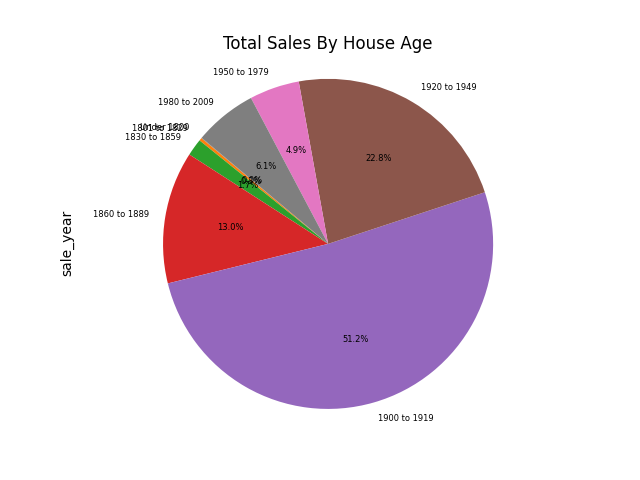

Text(0.5, 1.0, 'Total Sales By House Age')

In [19]:
labels = ['Under 1800','1801 to 1829','1830 to 1859','1860 to 1889','1900 to 1919','1920 to 1949', '1950 to 1979', '1980 to 2009', '2010 to Up']
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0.2) 
bins = [1800, 1829, 1859, 1889, 1919, 1949, 1979, 2009, 2019]
second_df['binned'] = pd.cut(second_df['year_built'], bins)
second_df.groupby(['binned']).count().plot(kind='pie', y='sale_year', labels=labels, autopct='%1.1f%%', textprops={'fontsize': 6}, legend=False, startangle=140)
plt.axis('equal')
plt.title("Total Sales By House Age")